# Polynomial Exercise

In [38]:
from numpy import polynomial as P
from scipy import interpolate
import numpy as np
from scipy import linalg as sla
from matplotlib import pyplot as plt
%matplotlib inline

In [39]:
p=P.Polynomial([2,-3,1])
p

Polynomial([ 2., -3.,  1.], [-1,  1], [-1,  1])

In [40]:
print(p.coef)
print(p.domain)
print(p.window)
print(p.roots()) # solution x of p(x)=0

[ 2. -3.  1.]
[-1  1]
[-1  1]
[ 1.  2.]


In [41]:
#evaluate
p([0.0,1.0,1.5])

/Users/terasakisatoshi/.pyenv/versions/3.5.1/lib/python3.5/site-packages/numpy/polynomial/_polybase.py:292: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  arg = off + scl*arg


array([ 2.  ,  0.  , -0.25])

In [42]:
# 2.5* T_0 + -3 T_1 + 0.5 T_2
ch=P.Chebyshev([2.5,-3.,0.5])
ch

Chebyshev([ 2.5, -3. ,  0.5], [-1,  1], [-1,  1])

In [43]:
p=P.Polynomial.fromroots([1,2])
p

Polynomial([ 2., -3.,  1.], [-1.,  1.], [-1.,  1.])

In [44]:
ch_fromroots=P.Chebyshev([2.5,-3,0.5],[-1,1],[-1,1])
ch_fromroots

Chebyshev([ 2.5, -3. ,  0.5], [-1.,  1.], [-1.,  1.])

In [45]:
ch_fromroots.roots()

array([ 1.,  2.])

In [46]:
ch_fromroots([0,1,1.5])

/Users/terasakisatoshi/.pyenv/versions/3.5.1/lib/python3.5/site-packages/numpy/polynomial/_polybase.py:292: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  arg = off + scl*arg


array([ 2.  ,  0.  , -0.25])

# fitting function

In [47]:
x=np.array([1,1.5,3,4])
y=np.array([1,0.5,2,4])
deg=len(x)-1
p=P.Polynomial.fit(x,y,deg)
p

Polynomial([ 1.15 ,  2.175,  1.35 , -0.675], [ 1.,  4.], [-1.,  1.])

In [59]:
p.convert([-1,1])

Polynomial([ 4.4, -5.3,  2.1, -0.2], [-1.,  1.], [-1.,  1.])

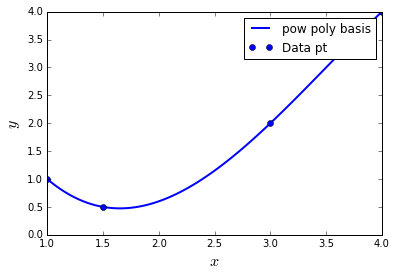

In [53]:
xs=np.linspace(x.min(),x.max(),100)
fig,ax=plt.subplots()
ax.plot(xs,p(xs),'b',lw=2,label='pow poly basis')
ax.plot(x,y,'o',label='Data pt')
ax.set_ylabel(r'$y$',fontsize=16)
ax.set_xlabel(r'$x$',fontsize=16)
ax.legend()
plt.show()

In [57]:
A=P.polynomial.polyvander(x,deg)
c=sla.solve(A,y)
print(c)
P.Polynomial(c)

[ 4.4 -5.3  2.1 -0.2]


Polynomial([ 4.4, -5.3,  2.1, -0.2], [-1,  1], [-1,  1])

In [61]:
print(P.chebyshev.chebvander(x,deg))
np.linalg.cond(P.chebyshev.chebvander(x,deg))

[[   1.     1.     1.     1. ]
 [   1.     1.5    3.5    9. ]
 [   1.     3.    17.    99. ]
 [   1.     4.    31.   244. ]]


4864.6335977699446

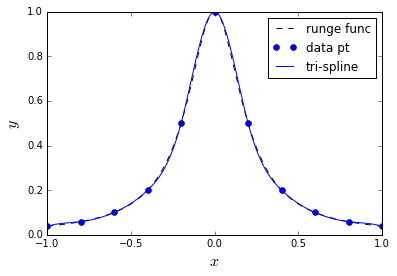

In [65]:
def runge(x):
    return 1/(25 * x **2 + 1)
x=np.linspace(-1,1,11)
f_i=interpolate.interp1d(x,runge(x),kind=3)
xs=np.linspace(-1,1,300)
fig,ax=plt.subplots()
ax.plot(xs,runge(xs),'k--',label='runge func')
ax.plot(x,runge(x),'o',label='data pt')
ax.plot(xs,f_i(xs),'b',label='tri-spline')
ax.legend()
ax.set_xlabel(r'$x$',fontsize=16)
ax.set_ylabel(r'$y$',fontsize=16)
plt.show()

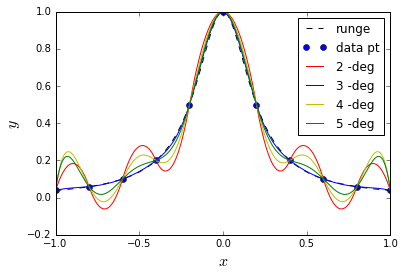

In [66]:
fig,ax=plt.subplots()
ax.plot(xs,runge(xs),'k--',label='runge')
ax.plot(x,runge(x),'o',label='data pt')
order=[2,3,4,5]
color=['r','b','y','g']
for i ,n in enumerate(order):
    f=interpolate.interp1d(x,runge(x),kind=n)
    ax.plot(xs,f(xs),c=color[i],label='%d -deg'%n)
ax.legend()
ax.set_xlabel(r'$x$',fontsize=16)
ax.set_ylabel(r'$y$',fontsize=16)
plt.show()